<a href="https://colab.research.google.com/github/ishika-mittal/Stock-Prices-Analytics-Dashboard/blob/main/Bollinger_Bands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bollinger Bands**

1. Three lines compose Bollinger Bands: A SMA(middle band) and an upper and lower band, which are typically 2 standard deviations +/- from a 20-day SMA, but can be modified.

2. The closer the prices move to the upper band, the more overbought the market, and vice-versa.

3. When the bands come close together, constricting the moving average, it is called a squeeze, indicating a period of low volatility and hence a potential sign of future increased volatility and vice-versa.

4. ~90% of price action occurs b/w the upper & lower bands. Any outlier is a major event, yet not a trading signal.

Details: https://www.investopedia.com/terms/b/bollingerbands.asp 

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Installing yfinance library for fetching historical stock data
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3MB 6.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=c958c61ab764d6bc3bb18b4ed2736b945d83fd71aee191db700d7acff472f422
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#Function to get the stock data
def stock_data(stock, start_date, end_date):

    tickerSymbol = stock

    #get data on this ticker
    tickerData = yf.Ticker(tickerSymbol)

    #get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)

    return tickerDf

In [4]:
#Fetching a 1Y dataset for better representation

df = stock_data("ITC.BO", "2020-06-08", "2021-06-08")
df.reset_index(level="Date", inplace=True)
df.drop(columns = ['Dividends', 'Stock Splits'], inplace=True)

print(df.shape)
df.head()

(250, 6)


,Date,Open,High,Low,Close,Volume
0,2020-06-08,182.945035,184.074883,178.199672,178.742004,744734
1,2020-06-09,179.826649,186.289389,178.696801,179.510300,1341970
2,2020-06-10,180.052627,183.668142,179.284339,180.097824,1024793
3,2020-06-11,180.775730,181.905578,174.990912,175.894791,855456
4,2020-06-12,171.375387,176.482296,169.974373,175.352448,980250


In [5]:
#Creating a dataset with only Closing Price column and Date as index

data = df.sort_index(ascending=True,axis=0)
df1 = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    df1["Date"][i]=data['Date'][i]
    df1["Close"][i]=data["Close"][i]

df1.index=df1.Date
df1.drop("Date",axis=1,inplace=True)
print(df1.shape)
df1.head()

(250, 1)


,Close
Date,
2020-06-08,178.742
2020-06-09,179.51
2020-06-10,180.098
2020-06-11,175.895
2020-06-12,175.352


In [6]:
#Defining Function

def BollingerB(data,window_size):

  #Calculate rolling mean and standard deviation using number of days set above
  rolling_mean = data['Close'].rolling(window_size).mean()
  rolling_std = data['Close'].rolling(window_size).std()

  #create two new DataFrame columns to hold values of upper and lower Bollinger bands
  data['Bollinger High'] = rolling_mean + (rolling_std*2)
  data['Bollinger Low'] = rolling_mean - (rolling_std*2)

  return data

In [7]:
#Implementing the function

BollingerB(df1,20)
df1.tail()

,Close,Bollinger High,Bollinger Low
Date,,,
2021-06-01,209.374,211.975086,193.697171
2021-06-02,203.342,211.468527,195.123147
2021-06-03,203.439,211.100131,196.226105
2021-06-04,203.147,210.767144,197.147713
2021-06-07,205.726,210.811988,197.696355


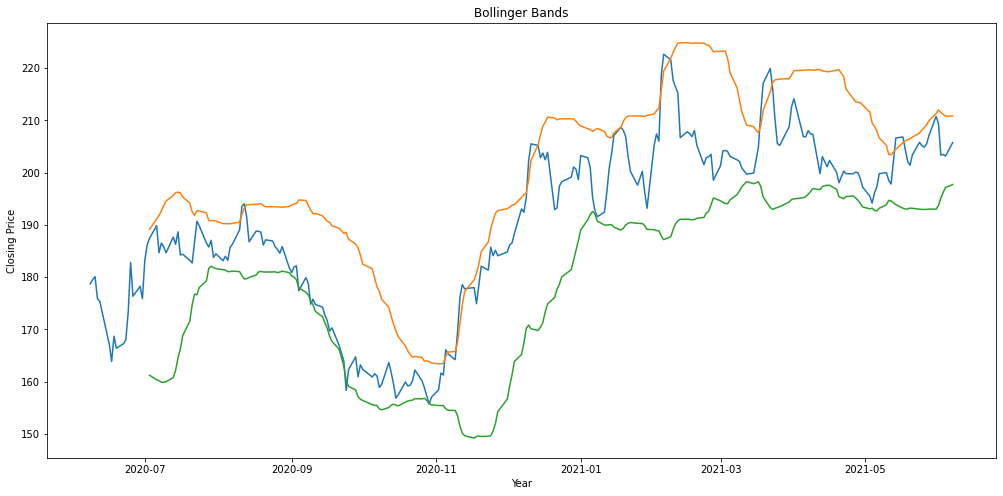

In [8]:
#Plotting

plt.figure(figsize=(17,8))

plt.plot(df1[['Close','Bollinger High','Bollinger Low']])

plt.title("Bollinger Bands")
plt.xlabel("Year")
plt.ylabel("Closing Price")

plt.show()